# COVID-19 CASES in PA #
Data Source: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Archives.aspx

In [27]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

In [29]:
# Web Scraped Data from PA Department of Health
df = pd.read_csv("pa_summary.csv")
df

,Date,Negative,Positive,Deaths
0,2020-04-01,37645,4843,63
1,2020-03-30,33777,4087,48
2,2020-03-29,30061,3394,38
3,2020-03-28,25254,2751,34
4,2020-03-27,21016,2218,22
5,2020-03-26,16441,1687,16
6,2020-03-25,11193,1127,11
7,2020-03-24,8643,851,7
8,2020-03-23,6595,644,6
9,2020-03-22,4964,479,2


### Assume Sum of Positive and Negative as Total Tested Population

In [33]:
# Sum of Positive and Negative as Total Tested Population
df['Tested'] = df['Positive'] + df['Negative']
df.head(5)

,Date,Negative,Positive,Deaths,Tested
0,2020-03-18,1187,133,0,1320
1,2020-03-19,1608,185,0,1793
2,2020-03-20,2574,268,0,2842
3,2020-03-21,3766,371,2,4137
4,2020-03-22,4964,479,2,5443


In [32]:
df = df.sort_values('Date', ascending = True).reset_index(drop=True)
df.head(5)

,Date,Negative,Positive,Deaths,Tested
0,2020-03-18,1187,133,0,1320
1,2020-03-19,1608,185,0,1793
2,2020-03-20,2574,268,0,2842
3,2020-03-21,3766,371,2,4137
4,2020-03-22,4964,479,2,5443


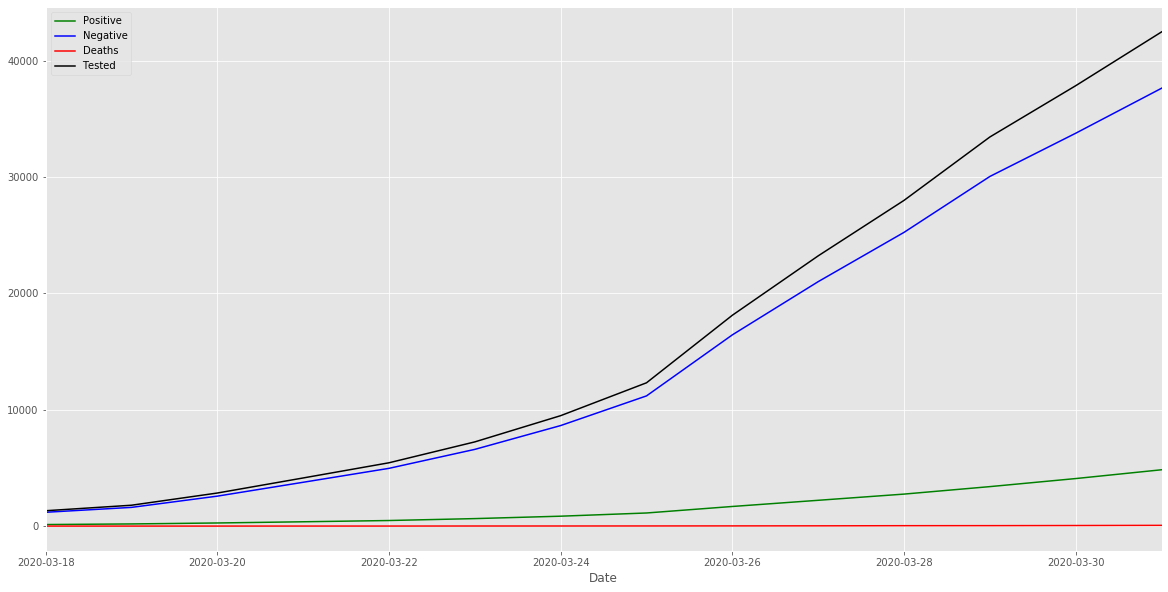

In [35]:
style.use('ggplot')
ax = plt.gca()
df.plot(kind='line',x='Date',y='Positive', color='green', ax=ax, figsize=(20,10))
df.plot(kind='line',x='Date',y='Negative', color='blue', ax=ax)
df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)
df.plot(kind='line',x='Date',y='Tested', color='black', ax=ax)
plt.show()